# Unsupervised Learning Model

### 1. BBC News Dataset

Website used: https://www.kaggle.com/datasets/hgultekin/bbcnewsarchive

In [2]:
file_path = "C:/Users/andyl/OneDrive/Documents/SIM/YEAR 3/ST3189 Machine Learning/Andy's Coursework/bbc-news-data.csv"

#### 1.1 Exploring the Data

In [3]:
import pandas as pd

df = pd.read_csv(file_path, sep = '\t')

df

,category,filename,title,content
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...
...,...,...,...,...
2220,tech,397.txt,BT program to beat dialler scams,BT is introducing two initiatives to help bea...
2221,tech,398.txt,Spam e-mails tempt net shoppers,Computer users across the world continue to i...
2222,tech,399.txt,Be careful how you code,A new European directive could put software w...
2223,tech,400.txt,US cyber security chief resigns,The man making sure US computer networks are ...


In [14]:
# Importing necessary libraries for data manipulation, NLP, and visualization
import pandas as pd  # Importing pandas for data manipulation
import numpy as np  # Importing numpy for numerical operations
import matplotlib.pyplot as plt # Importing plt for plots
import seaborn as sns # Importing seaborns for visualisation
import re  # Importing re for regular expressions

# NLP Libraries
import nltk
from nltk.corpus import stopwords  # Importing NLTK's stopwords
from nltk.stem import WordNetLemmatizer #Lemmatizing the words
import spacy

C:\Users\andyl\AppData\Local\Temp\ipykernel_41100\3108332235.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = category_counts.index, y = category_counts.values, palette = 'viridis')


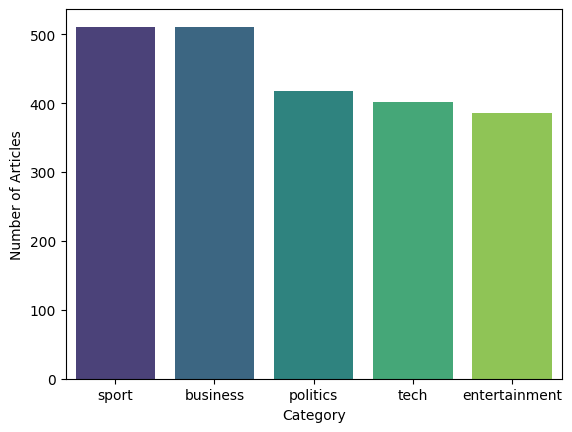

In [15]:
category_counts = df['category'].value_counts()

sns.barplot(x = category_counts.index, y = category_counts.values, palette = 'viridis')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.show()

#### 1.2 Lemmatization

Lemmatization is a process that groups different forms of a word into its base form.

For example, words like 'running', 'ran' are converted back to its base form word 'run'. This helps to improve consistency in text analysis and significantly reduce the number of unique tokens (words) in the dataset, hence reducing the dimension which will explain in section 2.1 TF-IDF

In [16]:
nlp = spacy.load('en_core_web_sm') # Load the spaCy English model

def lemmatize_text(text):
    doc = nlp(text) # Process the text with spaCy

    lemmatized_tokens = [token.lemma_ for token in doc] # Extract lemmatized tokens based on allowed part-of-speech tags

    return ' '.join(lemmatized_tokens) # Join the lemmatized tokens into a string


df['cleaned_content'] = df['content'].apply(lemmatize_text)


#### 1.3 Removing Stopwords

Stopwords are words that are commonly used in the language such as "and", "the", "is", "a", "an" etc. However, these words are too common and are often considered "noise" in the dataset as they don't contribute significant meaning in text analysis.

Removing stopwords will ensure the model will focus on more meaningful words that are more important when we are grouping documents into subtopics.

In [17]:
stop_words = set(stopwords.words('english'))

custom_stopwords = {'say', 'bn', 'mr'}

stop_words.update(custom_stopwords)

def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W+', ' ', text) # remove punctuation
    text = re.sub(r'[0-9\\]+', ' ', text) # remove numbers
    text = ' '.join([word for word in text.split() if word not in stop_words]) # remove stop words
    return text

df['cleaned_content'] = df['cleaned_content'].apply(clean_text)


In [18]:
df['cleaned_content']

0       quarterly profit us medium giant timewarner ju...
1       dollar hit high level euro almost three month ...
2       owner embattle russian oil giant yukos ask buy...
3       british airways blame high fuel price drop pro...
4       share uk drink food firm allied domecq rise sp...
                              ...                        
2220    bt introduce two initiative help beat rogue di...
2221    computer user across world continue ignore sec...
2222    new european directive could put software writ...
2223    man make sure us computer network safe secure ...
2224    online role playing game time consume enthral ...
Name: cleaned_content, Length: 2225, dtype: object

### 2. Topic Modelling

#### 2.1 TFIDF

TFIDF means Term Frequency and Inverse Document Frequency.

Term Frequency $tf(t,d)$ is given by this formula:

$tf(t,d) = \frac{\displaystyle f_{t,d}}{\displaystyle\sum_{t' \in d} f_{t',d}}$ 

$f_{t,d}$ is to find the frequency of a term $t$ within each document $d$, and the denominator is a summation iterates over all term $t'$ in the document $d$, which represent the total word count in the document $d$. Since documents have different word counts, $tf(t,d)$ normalise the term frequency by adjusting for document length. This ensures that we can fairly compare the importance of a term $t$ across all the documents.

Inverse Document Frequency $idf(t,D) = \log\left(\displaystyle\frac{N}{|{d:d \in D \text{ and } t \in d}|}\right)$

- $N$: total number of documents
- $|{d:d \in D \text{ and } t \in d}|$ : the modulus symbol is finding the number of elements in the set. This finds the number of documents where the term $t$ appears.

$idf(t,D)$ helps to downweight common terms and upweight rare but significant terms in a dataset. For example, words like 'say' appear very frequently in all documents and don't carry much meaning. For instance, we have the word 'say' appearing in all $N$ documents, then $idf('say', D) = log(\frac{N}{N}) = 0$. On the contrary, rare words like 'machine learning' is more informative for distinguishing documents, and hence higher $idf$ score.

Finally, we have: $tf\text{-}idf(t,d) = tf(t,d) \cdot idf(t,D)$. 

$tf\text{-}idf$ balances Term Frequency ($tf$) and Inverse Document Frequency ($idf$), ensuring that the terms which are both frequent within individual documents but rare across the documents are weighted higher, making them more significant for text analysis. Note that there are various versions of the formula. 

**TFIDF-vectorizer**

We want to store all these TFIDF weightage values in an orderly manner, and the TFIDF-vectorizer helps to store them into a matrix. TFIDF vectorizer has a parameters called ngram_range($m,n$), where $m < n$, which means you want to get all subsequences of words of lengths of $m, m+1, ... , n$ you can form with all the words in all documents. 

Then for every document $d \in D$, it shows the weightage for each combinations of those words. All and all, you will get a matrix of an order of $|D|$ by $|V|$, where $|D|$ is the number of documents and $|V|$ is the vocabulary size (i.e. the number of unique terms generated based on the ngram_range($m,n$) parameter).

For example, we have the following phrase in a document $d$: "quick brown fox" and we choose ngram_range = (1,2), so it will churn a vector for document $d$ as such:

|| quick | brown | fox | quick brown |  brown fox |
| :-: | :-: | :-: | :-: | :-: | :-: |
| $d$ |TF-IDF value  |TF-IDF value   | TF-IDF value |TF-IDF value  | TF-IDF value |




#### 2.2 Latent Dirichlet Allocation

Latent Dirichlet Allocation (LDA) 

1. Documents are mixtures of topics, and each topic is represented by a set of words. For example, "sport" topic might have words like "game", "team" and "tournament" etc. Each document is typically a combination of multiple topics.

2. LDA helps to discover topics by analysing all the words across the documnets and figure out through statistical method (especially Bayesian inferences) to figure out which topics are likely to exist, based on the words that appear together often.

3. LDA helps to find hidden themes based, and categorise the words, summarising large amount of text data. Since, the BBC news dataset has already have categorised them to 5 groups (Business, Sports, Politics, Technology and Entertainment), we will use LDA to uncover potential subtopics within each of these categories.

#### 2.3 What are the subtopics in each category?

##### 2.3.1 Business

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [31]:
business_df = df[df['category'] == 'business']

vectorizer_business = TfidfVectorizer(max_df = 0.5, min_df = 5, stop_words = 'english', ngram_range = (1,2))
tfidf_matrix_business = vectorizer_business.fit_transform(business_df['cleaned_content'])

In [32]:
lda_business = LatentDirichletAllocation(n_components= 3, random_state=42) # n_components means how many topics

lda_business.fit(tfidf_matrix_business) # Fit the LDA model on the business category's TF-IDF matrix

LatentDirichletAllocation(n_components=3, random_state=42)

In [33]:
vectorizer_business.get_feature_names_out()

array(['abandon', 'ability', 'able', ..., 'yukos legal', 'yushchenko',
       'zone'], dtype=object)

In [54]:
lda_business.components_[0]

array([0.81263541, 1.07871631, 1.97801426, ..., 0.34248488, 1.602752  ,
       1.29471738])

In [ ]:
# argsort is to rearrange them from the smallest to the largest value
# start_index is empty, it defaults to the end of the list
# end_index is -11, it means stops at the 11th last element (not including it)
# -1 means in reverse order

lda_business.components_[0].argsort()[:-11:-1] 

array([1003, 2257, 2346, 1551,  209,  800, 2204, 1146, 1132, 1946],
      dtype=int64)

In [35]:
def display_topics(model, vectorizer, n_top_words=10):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])) #rearrange 
        print("\n")

In [36]:
display_topics(lda_business, vectorizer_business, n_top_words=10)

Topic #0:
firm, sale, share, market, bank, economy, rise, growth, government, price


Topic #1:
housing, house price, rate, bank england, england, mortgage, crude, housing market, slowdown, house


Topic #2:
yukos, russian, gazprom, lse, boerse, deutsche boerse, yugansk, rosneft, deutsche, khodorkovsky




Possible Subtopics for Business: 

1. Monetary and Fiscal Policy: seem to discuss about the banks and government which may link to economic policies

2. Housing Market: seem to discuss about the mortgage and the intervention of Bank of England

3. Russia Economy: seem to discuss about Yukos (a Russia oil company) and how it may link to big financial markets like London Stock Exchange (LSE) and German Stock Exchange (Detusche Boerse)

##### 2.3.2 Sports

In [37]:
sports_df = df[df['category'] == 'sport']

vectorizer_sports = TfidfVectorizer(max_df = 0.5, min_df = 5, stop_words = 'english', ngram_range = (1,2))
tfidf_matrix_sports = vectorizer_sports.fit_transform(sports_df['cleaned_content'])

lda_sports = LatentDirichletAllocation(n_components= 3, random_state=42)
lda_sports.fit(tfidf_matrix_sports)

display_topics(lda_sports, vectorizer_sports, n_top_words=10)


Topic #0:
england, player, club, wales, team, chelsea, half, ireland, rugby, cup


Topic #1:
open, world, seed, champion, set, final, race, olympic, australian, second


Topic #2:
conte, balco, enhance, drug, jones, doping, steroid, enhance drug, performance enhance, federal




Possible Subtopics for Sports: 
1. Rugby & Football related: Including teams like Chelsea and clubs from other countries

2. World Tournaments & Olympics: seem to discuss a major tournament final and the championship game

3. Doping & Scandals: seem to discuss about BALCO (Bay Area laboratory Co-operative) that supplied anabolic steroids

##### 2.3.3 Politics

In [38]:
politics_df = df[df['category'] == 'politics']

vectorizer_politics = TfidfVectorizer(max_df = 0.5, min_df = 5, stop_words = 'english', ngram_range = (1,2))
tfidf_matrix_politics = vectorizer_politics.fit_transform(politics_df['cleaned_content'])

lda_politics = LatentDirichletAllocation(n_components= 3, random_state=42)
lda_politics.fit(tfidf_matrix_politics)

display_topics(lda_politics, vectorizer_politics, n_top_words=10)

Topic #0:
labour, election, blair, brown, plan, howard, tax, new, lord, tell


Topic #1:
ukip, kilroy, kilroy silk, silk, casino, poster, peston, book, veritas, new book


Topic #2:
livingstone, jewish, camp guard, ken livingstone, mayor, apologise, concentration camp, concentration, evening standard, ken




Possible Subtopics for Politics: 
1. Labour Party and UK Elections: seems to connect with significant figures like Tony Blair and Gordon Brown of the Labour Party

2. UKIP (UK Independence Party): seems to connect with Robert-Kilroy-Silk, who join the UKIP

3. Controversies: seems to connect with Ken Livingstone and his comments about the Jewish people

##### 2.3.4 Technology Subtopics

In [39]:
tech_df = df[df['category'] == 'tech']

vectorizer_tech = TfidfVectorizer(max_df = 0.5, min_df = 5, stop_words = 'english', ngram_range = (1,2))
tfidf_matrix_tech = vectorizer_tech.fit_transform(tech_df['cleaned_content'])

lda_tech = LatentDirichletAllocation(n_components= 3, random_state=42)
lda_tech.fit(tfidf_matrix_tech)

display_topics(lda_tech, vectorizer_tech, n_top_words=10)

Topic #0:
ds handheld, nintendo release, handheld console, yen, ds, ray, hd dvd, gaming device, console sale, spider man


Topic #1:
patent, parliament, directive, law, eu, invention, european parliament, draft, patenting, european


Topic #2:
game, mobile, phone, service, user, music, computer, software, net, site




Possible Subtopics for Technology:

1. Gaming Consoles: seems to discuss on Nintendo DS

2. Legal Proceedings: seems to discuss on the patent law, particularly in the EU

3. Internet: seems to discuss about the software and internet-based services

##### 2.3.5 Entertainment Subtopics

In [40]:
entertainment_df = df[df['category'] == 'entertainment']

vectorizer_entertainment = TfidfVectorizer(max_df = 0.5, min_df = 5, stop_words = 'english', ngram_range = (1,2))
tfidf_matrix_entertainment = vectorizer_entertainment.fit_transform(entertainment_df['cleaned_content'])

lda_entertainment = LatentDirichletAllocation(n_components= 3, random_state=42)
lda_entertainment.fit(tfidf_matrix_entertainment)

display_topics(lda_entertainment, vectorizer_entertainment, n_top_words=10)

Topic #0:
music, band, new, include, number, album, festival, good, chart, award


Topic #1:
good, award, oscar, win, actress, aviator, actor, nomination, director, nominate


Topic #2:
big brother, bez, eviction, celebrity big, ladbrokes, lush, bet, odd, nielsen, bookmaker




Possible Subtopics for Entertainment:

1. Music: seems to discuss on new release of musics and awards

2. Film: seems to discuss about film awards, specifically the Oscars. Likely to cover award nomination

3. TV Shows: seems to discuss about Brigitte Nielsen who acted in the show 'Big Brother'